In [2]:
%cat /kaggle/input/solarpanel/ImageSet/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 8
names: ['MultiByPassed', 'MultiDiode', 'MultiHotSpot', 'SingleByPassed', 'SingleDiode', 'SingleHotSpot', 'StringOpenCircuit', 'StringReversedPolarity']

roboflow:
  workspace: solarpanels-odahn
  project: anomalies-detection-blv72
  version: 14
  license: Private
  url: https://app.roboflow.com/solarpanels-odahn/anomalies-detection-blv72/14

In [3]:
YAML_DIR = "/kaggle/input/solarpanel/ImageSet/data.yaml"

In [4]:
# define number of classes based on YAML
import yaml
with open(YAML_DIR, 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(num_classes)

8


In [11]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.7 MB/s eta 0:00:00a 0:00:01


In [12]:
import ultralytics
import os

# Find the yaml files
path = os.path.dirname(ultralytics.__file__)
yaml_path = os.path.join(path, "cfg", "models")
print(os.listdir(yaml_path))  # Find the yolo26 folder

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
['v10', '11', '12', 'v3', 'rt-detr', 'v8', 'v6', '26', 'v5', 'v9']


In [8]:
# Look inside the '26' folder
yolo26_path = os.path.join(yaml_path, "26")
print(os.listdir(yolo26_path))

['yolo26-pose.yaml', 'yolo26.yaml', 'yolo26-p6.yaml', 'yoloe-26.yaml', 'yolo26-obb.yaml', 'yolo26-cls.yaml', 'yolo26-p2.yaml', 'yolo26-seg.yaml', 'yoloe-26-seg.yaml']


In [9]:
with open(os.path.join(yolo26_path, "yolo26.yaml"), "r") as f:
    print(f.read())

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Ultralytics YOLO26 object detection model with P3/8 - P5/32 outputs
# Model docs: https://docs.ultralytics.com/models/yolo26
# Task docs: https://docs.ultralytics.com/tasks/detect

# Parameters
nc: 80 # number of classes
end2end: True # whether to use end-to-end mode
reg_max: 1 # DFL bins
scales: # model compound scaling constants, i.e. 'model=yolo26n.yaml' will call yolo26.yaml with scale 'n'
  # [depth, width, max_channels]
  n: [0.50, 0.25, 1024] # summary: 260 layers, 2,572,280 parameters, 2,572,280 gradients, 6.1 GFLOPs
  s: [0.50, 0.50, 1024] # summary: 260 layers, 10,009,784 parameters, 10,009,784 gradients, 22.8 GFLOPs
  m: [0.50, 1.00, 512] # summary: 280 layers, 21,896,248 parameters, 21,896,248 gradients, 75.4 GFLOPs
  l: [1.00, 1.00, 512] # summary: 392 layers, 26,299,704 parameters, 26,299,704 gradients, 93.8 GFLOPs
  x: [1.00, 1.50, 512] # summary: 392 layers, 58,993,368 parameters, 58,993,368 gradients

In [16]:
import shutil
import yaml

# Copy the original yaml to working directory
src = os.path.join(yolo26_path, "yolo26.yaml")
shutil.copy(src, "/kaggle/working/yolo26-custom.yaml")

# Read it
with open("/kaggle/working/yolo26-custom.yaml", "r") as f:
    config = yaml.safe_load(f)

print(f"{config}")

{'nc': 80, 'end2end': True, 'reg_max': 1, 'scales': {'n': [0.5, 0.25, 1024], 's': [0.5, 0.5, 1024], 'm': [0.5, 1.0, 512], 'l': [1.0, 1.0, 512], 'x': [1.0, 1.5, 512]}, 'backbone': [[-1, 1, 'Conv', [64, 3, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 2, 'C3k2', [256, False, 0.25]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 2, 'C3k2', [512, False, 0.25]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 2, 'C3k2', [512, True]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 2, 'C3k2', [1024, True]], [-1, 1, 'SPPF', [1024, 5, 3, True]], [-1, 2, 'C2PSA', [1024]]], 'head': [[-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 6], 1, 'Concat', [1]], [-1, 2, 'C3k2', [512, True]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 4], 1, 'Concat', [1]], [-1, 2, 'C3k2', [256, True]], [-1, 1, 'Conv', [256, 3, 2]], [[-1, 13], 1, 'Concat', [1]], [-1, 2, 'C3k2', [512, True]], [-1, 1, 'Conv', [512, 3, 2]], [[-1, 10], 1, 'Concat', [1]], [-1, 1, 'C3k2', [1024, True, 0.5, True]], [[16, 19, 22], 1, 'Detect', ['nc']]]}


In [17]:
# Change nc from 80 to 8
config['nc'] = 8

print(f"{config}")

{'nc': 8, 'end2end': True, 'reg_max': 1, 'scales': {'n': [0.5, 0.25, 1024], 's': [0.5, 0.5, 1024], 'm': [0.5, 1.0, 512], 'l': [1.0, 1.0, 512], 'x': [1.0, 1.5, 512]}, 'backbone': [[-1, 1, 'Conv', [64, 3, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 2, 'C3k2', [256, False, 0.25]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 2, 'C3k2', [512, False, 0.25]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 2, 'C3k2', [512, True]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 2, 'C3k2', [1024, True]], [-1, 1, 'SPPF', [1024, 5, 3, True]], [-1, 2, 'C2PSA', [1024]]], 'head': [[-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 6], 1, 'Concat', [1]], [-1, 2, 'C3k2', [512, True]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 4], 1, 'Concat', [1]], [-1, 2, 'C3k2', [256, True]], [-1, 1, 'Conv', [256, 3, 2]], [[-1, 13], 1, 'Concat', [1]], [-1, 2, 'C3k2', [512, True]], [-1, 1, 'Conv', [512, 3, 2]], [[-1, 10], 1, 'Concat', [1]], [-1, 1, 'C3k2', [1024, True, 0.5, True]], [[16, 19, 22], 1, 'Detect', ['nc']]]}


In [18]:
# Save it
with open("/kaggle/working/yolo26-custom.yaml", "w") as f:
    yaml.dump(config, f, default_flow_style=True, sort_keys=False)

print("Custom yaml created!")

# Verify
with open("/kaggle/working/yolo26-custom.yaml", "r") as f:
    print(f.read())

Custom yaml created!
{nc: 8, end2end: true, reg_max: 1, scales: {n: [0.5, 0.25, 1024], s: [0.5, 0.5, 1024],
    m: [0.5, 1.0, 512], l: [1.0, 1.0, 512], x: [1.0, 1.5, 512]}, backbone: [[-1, 1,
      Conv, [64, 3, 2]], [-1, 1, Conv, [128, 3, 2]], [-1, 2, C3k2, [256, false, 0.25]],
    [-1, 1, Conv, [256, 3, 2]], [-1, 2, C3k2, [512, false, 0.25]], [-1, 1, Conv, [
        512, 3, 2]], [-1, 2, C3k2, [512, true]], [-1, 1, Conv, [1024, 3, 2]], [-1,
      2, C3k2, [1024, true]], [-1, 1, SPPF, [1024, 5, 3, true]], [-1, 2, C2PSA, [
        1024]]], head: [[-1, 1, nn.Upsample, [None, 2, nearest]], [[-1, 6], 1, Concat,
      [1]], [-1, 2, C3k2, [512, true]], [-1, 1, nn.Upsample, [None, 2, nearest]],
    [[-1, 4], 1, Concat, [1]], [-1, 2, C3k2, [256, true]], [-1, 1, Conv, [256, 3,
        2]], [[-1, 13], 1, Concat, [1]], [-1, 2, C3k2, [512, true]], [-1, 1, Conv,
      [512, 3, 2]], [[-1, 10], 1, Concat, [1]], [-1, 1, C3k2, [1024, true, 0.5, true]],
    [[16, 19, 22], 1, Detect, [nc]]]}



In [19]:
import os
print(os.listdir('/kaggle/input/solarpanel/ImageSet/'))

['README.txt', 'data.yaml', 'valid', 'test', 'train']


In [20]:
import yaml

data_yaml = {
    'train': '/kaggle/input/solarpanel/ImageSet/train/images',
    'val': '/kaggle/input/solarpanel/ImageSet/valid/images',
    'test': '/kaggle/input/solarpanel/ImageSet/test/images',
    'nc': 8,
    'names': ['MultiByPassed', 'MultiDiode', 'MultiHotSpot', 'SingleByPassed', 
               'SingleDiode', 'SingleHotSpot', 'StringOpenCircuit', 'StringReversedPolarity']
}

with open("/kaggle/working/data.yaml", "w") as f:
    yaml.dump(data_yaml, f, default_flow_style=False, sort_keys=False)

print("data.yaml ready!")

data.yaml ready!


In [21]:
# TRAINING FROM SCRATCH
# from ultralytics import YOLO

# model = YOLO("/kaggle/working/yolo26-custom.yaml")

# model.train(
#     data="/kaggle/working/data.yaml",
#     epochs=50,
#     imgsz=640,
#     batch=16,
#     project="/kaggle/working",
#     name="yolo26-solarpanel"
# )

# LOAD PRETRAINED MODEL. MODEL HEAD IS CONFIGURED AUTOMATICALLY
from ultralytics import YOLO

# Load pretrained weights BUT override nc with your data.yaml
model = YOLO("yolo26s.pt")

model.train(
    data="/kaggle/working/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    project="/kaggle/working",
    name="yolo26-solarpanel"
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo26-solarpanel, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff33bf03200>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [24]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [25]:
%tensorboard --logdir /kaggle/working/yolo26-solarpanel

Reusing TensorBoard on port 6006 (pid 425), started 0:00:42 ago. (Use '!kill 425' to kill it.)

<IPython.core.display.Javascript object>

In [26]:
!kill 425

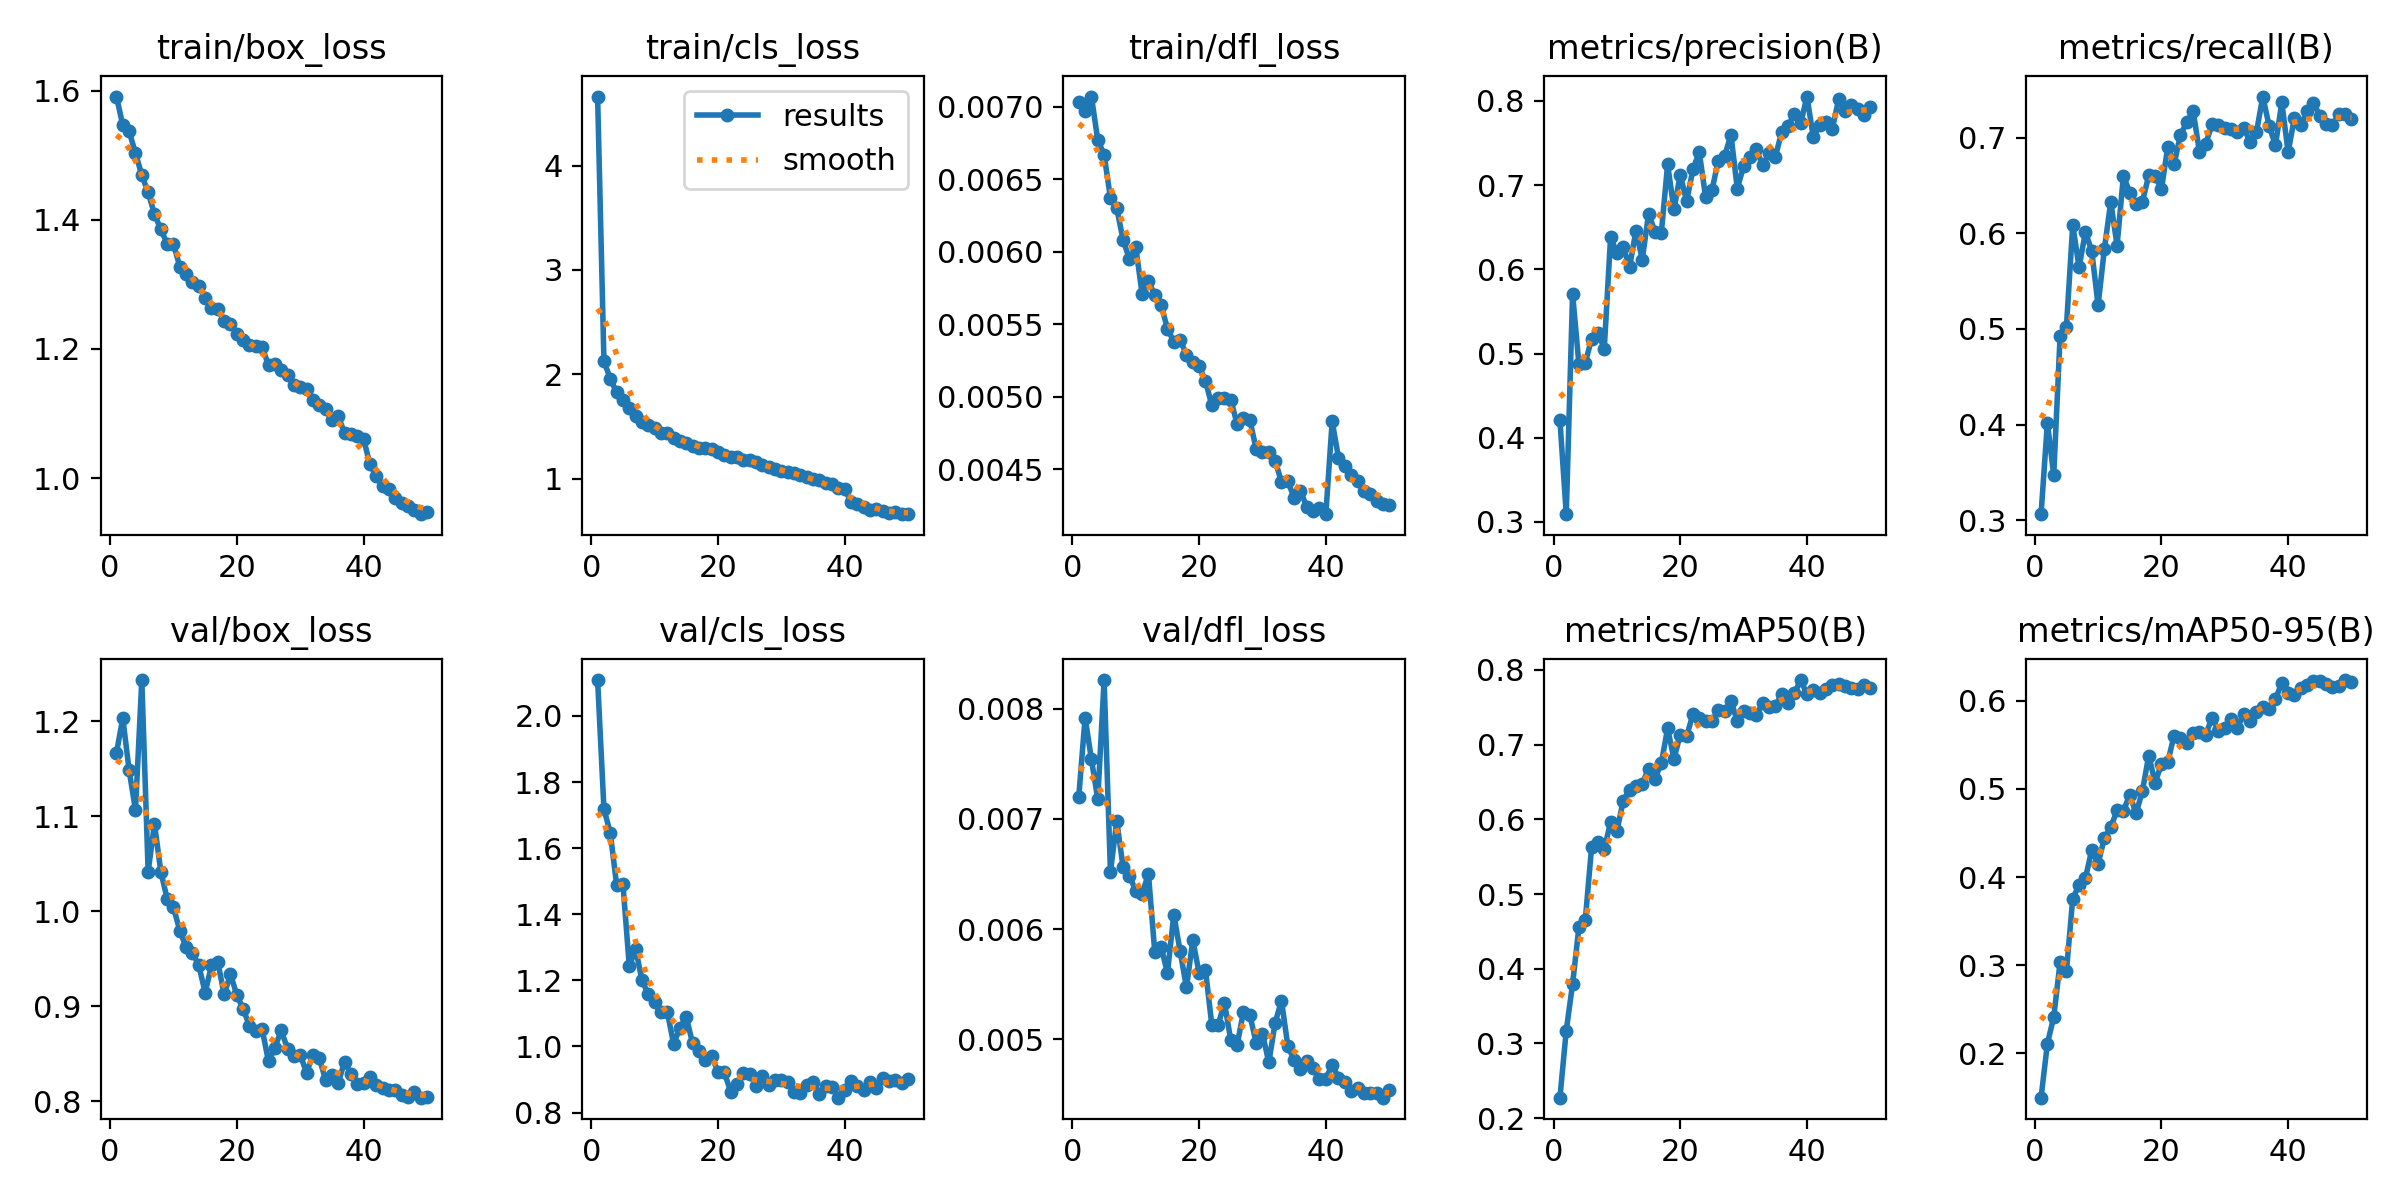

In [27]:
from IPython.display import Image
Image('/kaggle/working/yolo26-solarpanel/results.png')

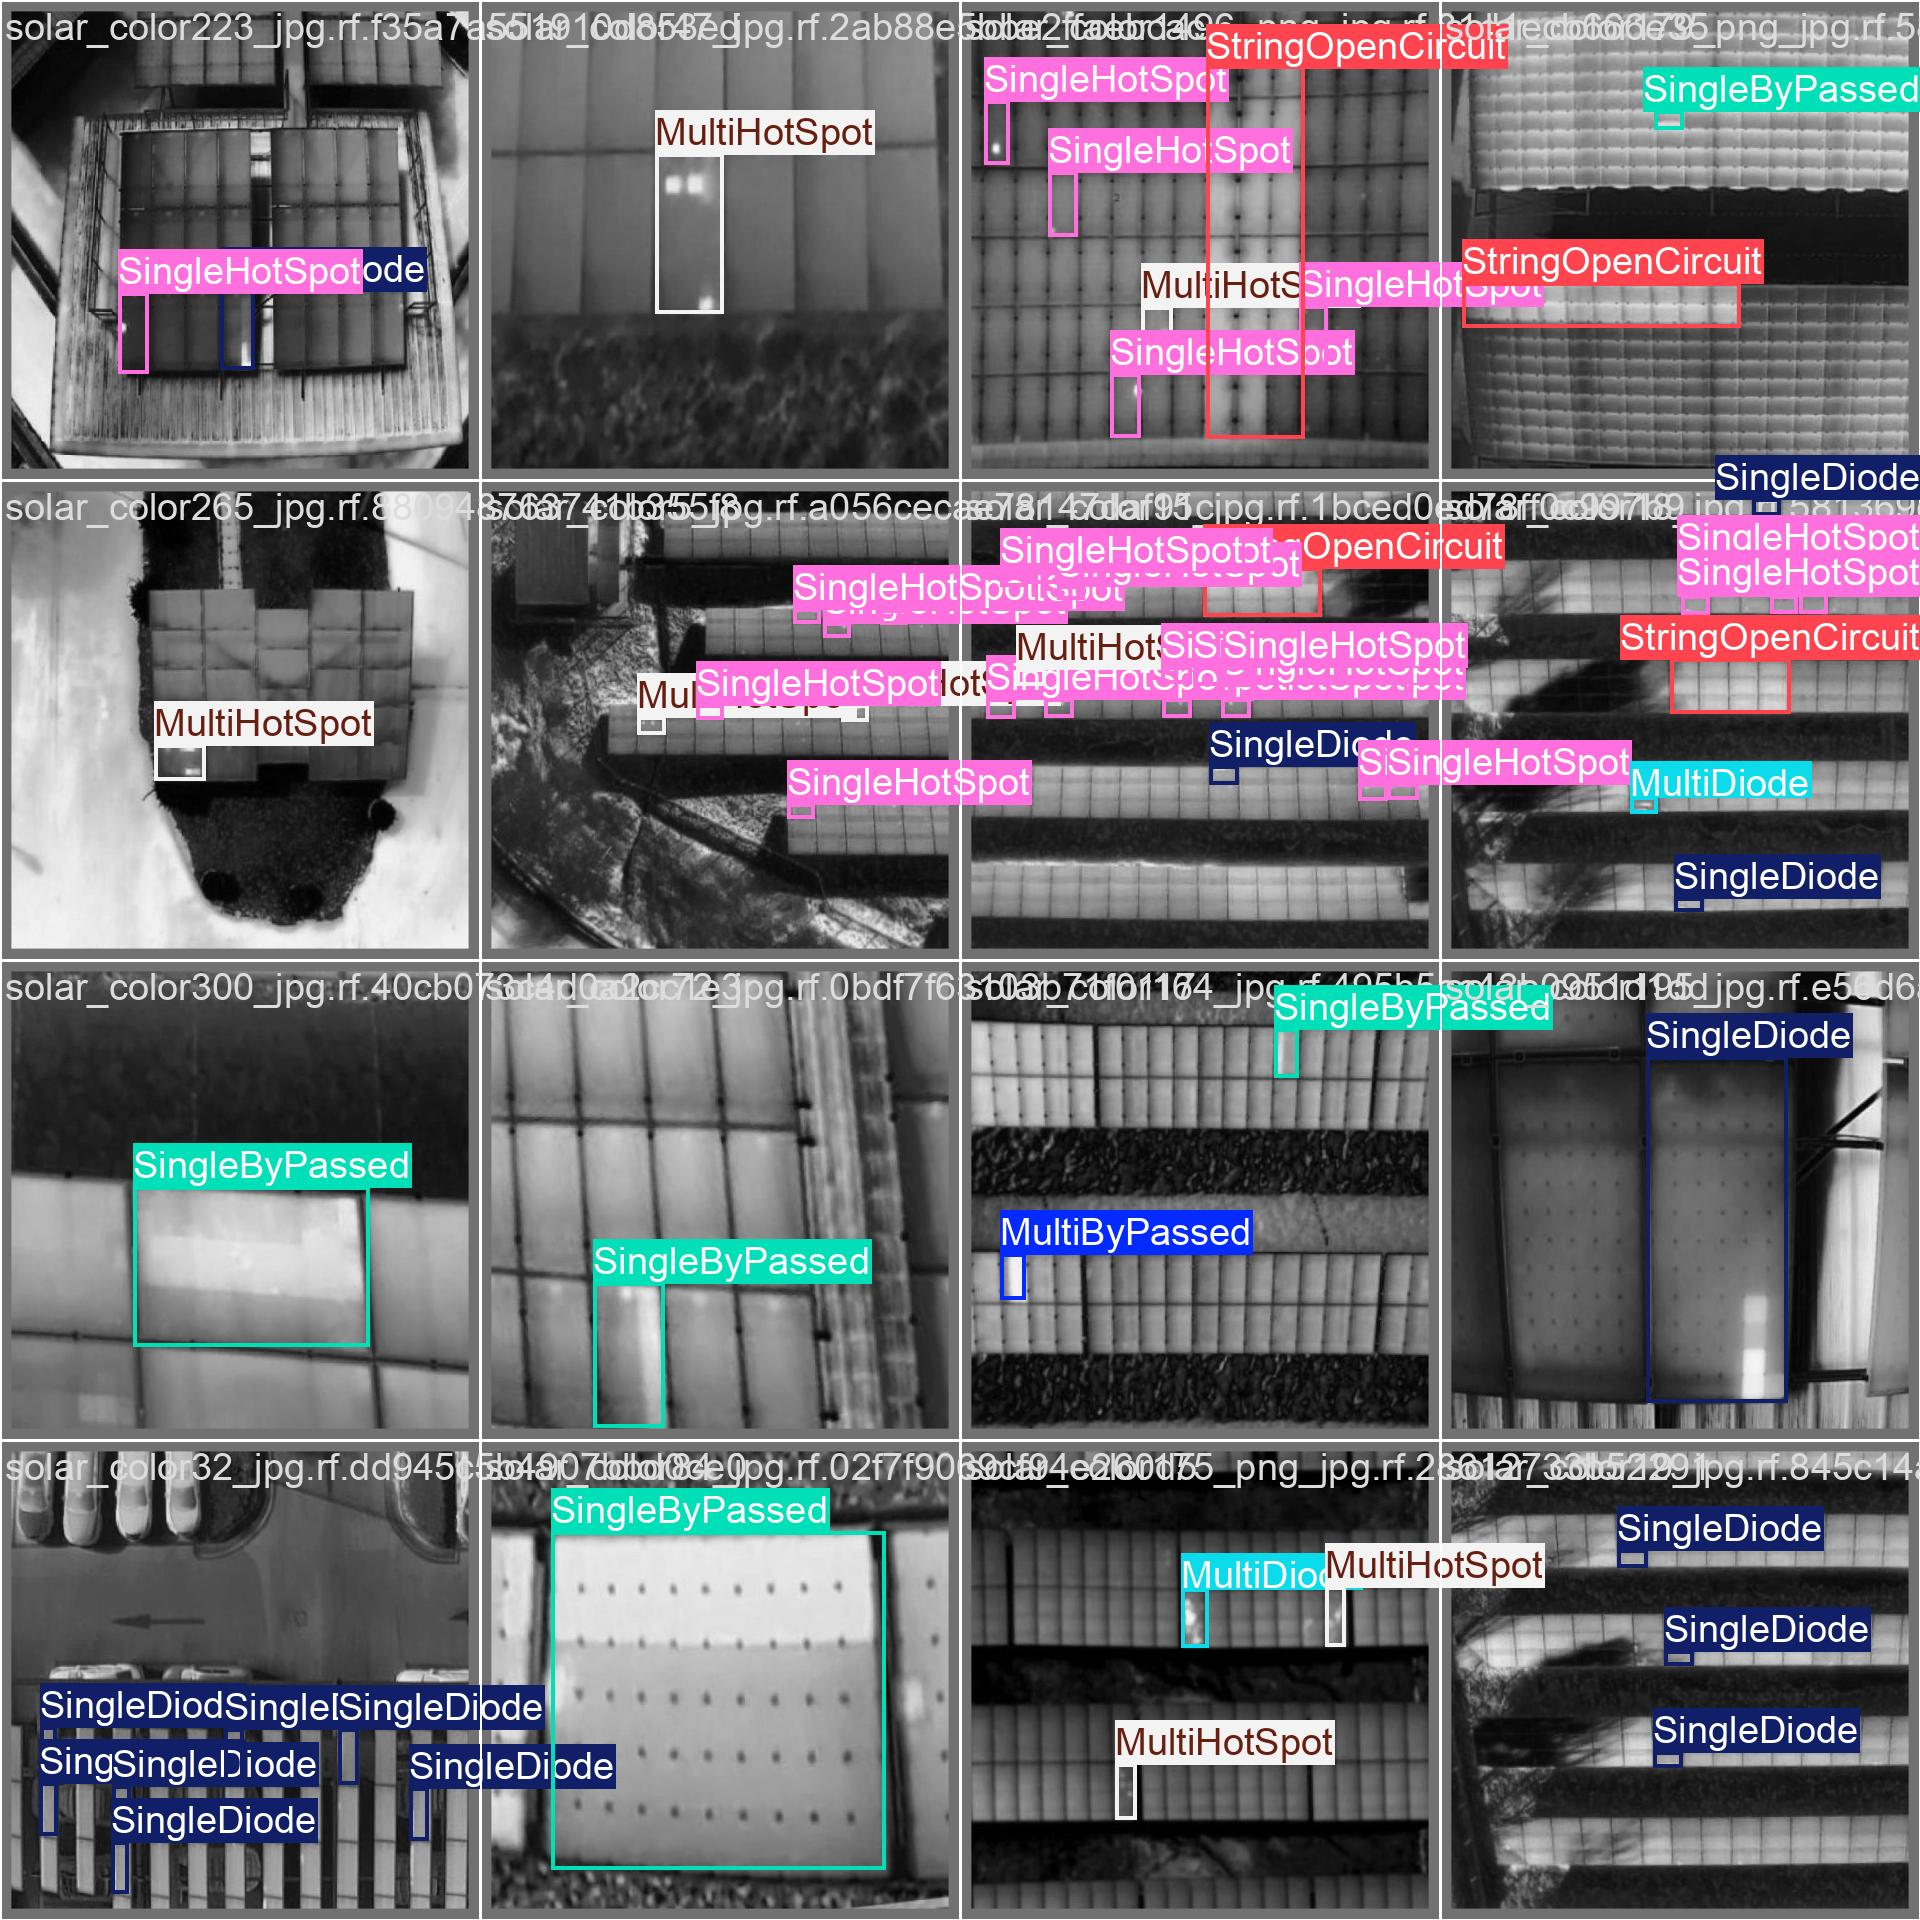

In [28]:
Image('/kaggle/working/yolo26-solarpanel/val_batch0_labels.jpg')

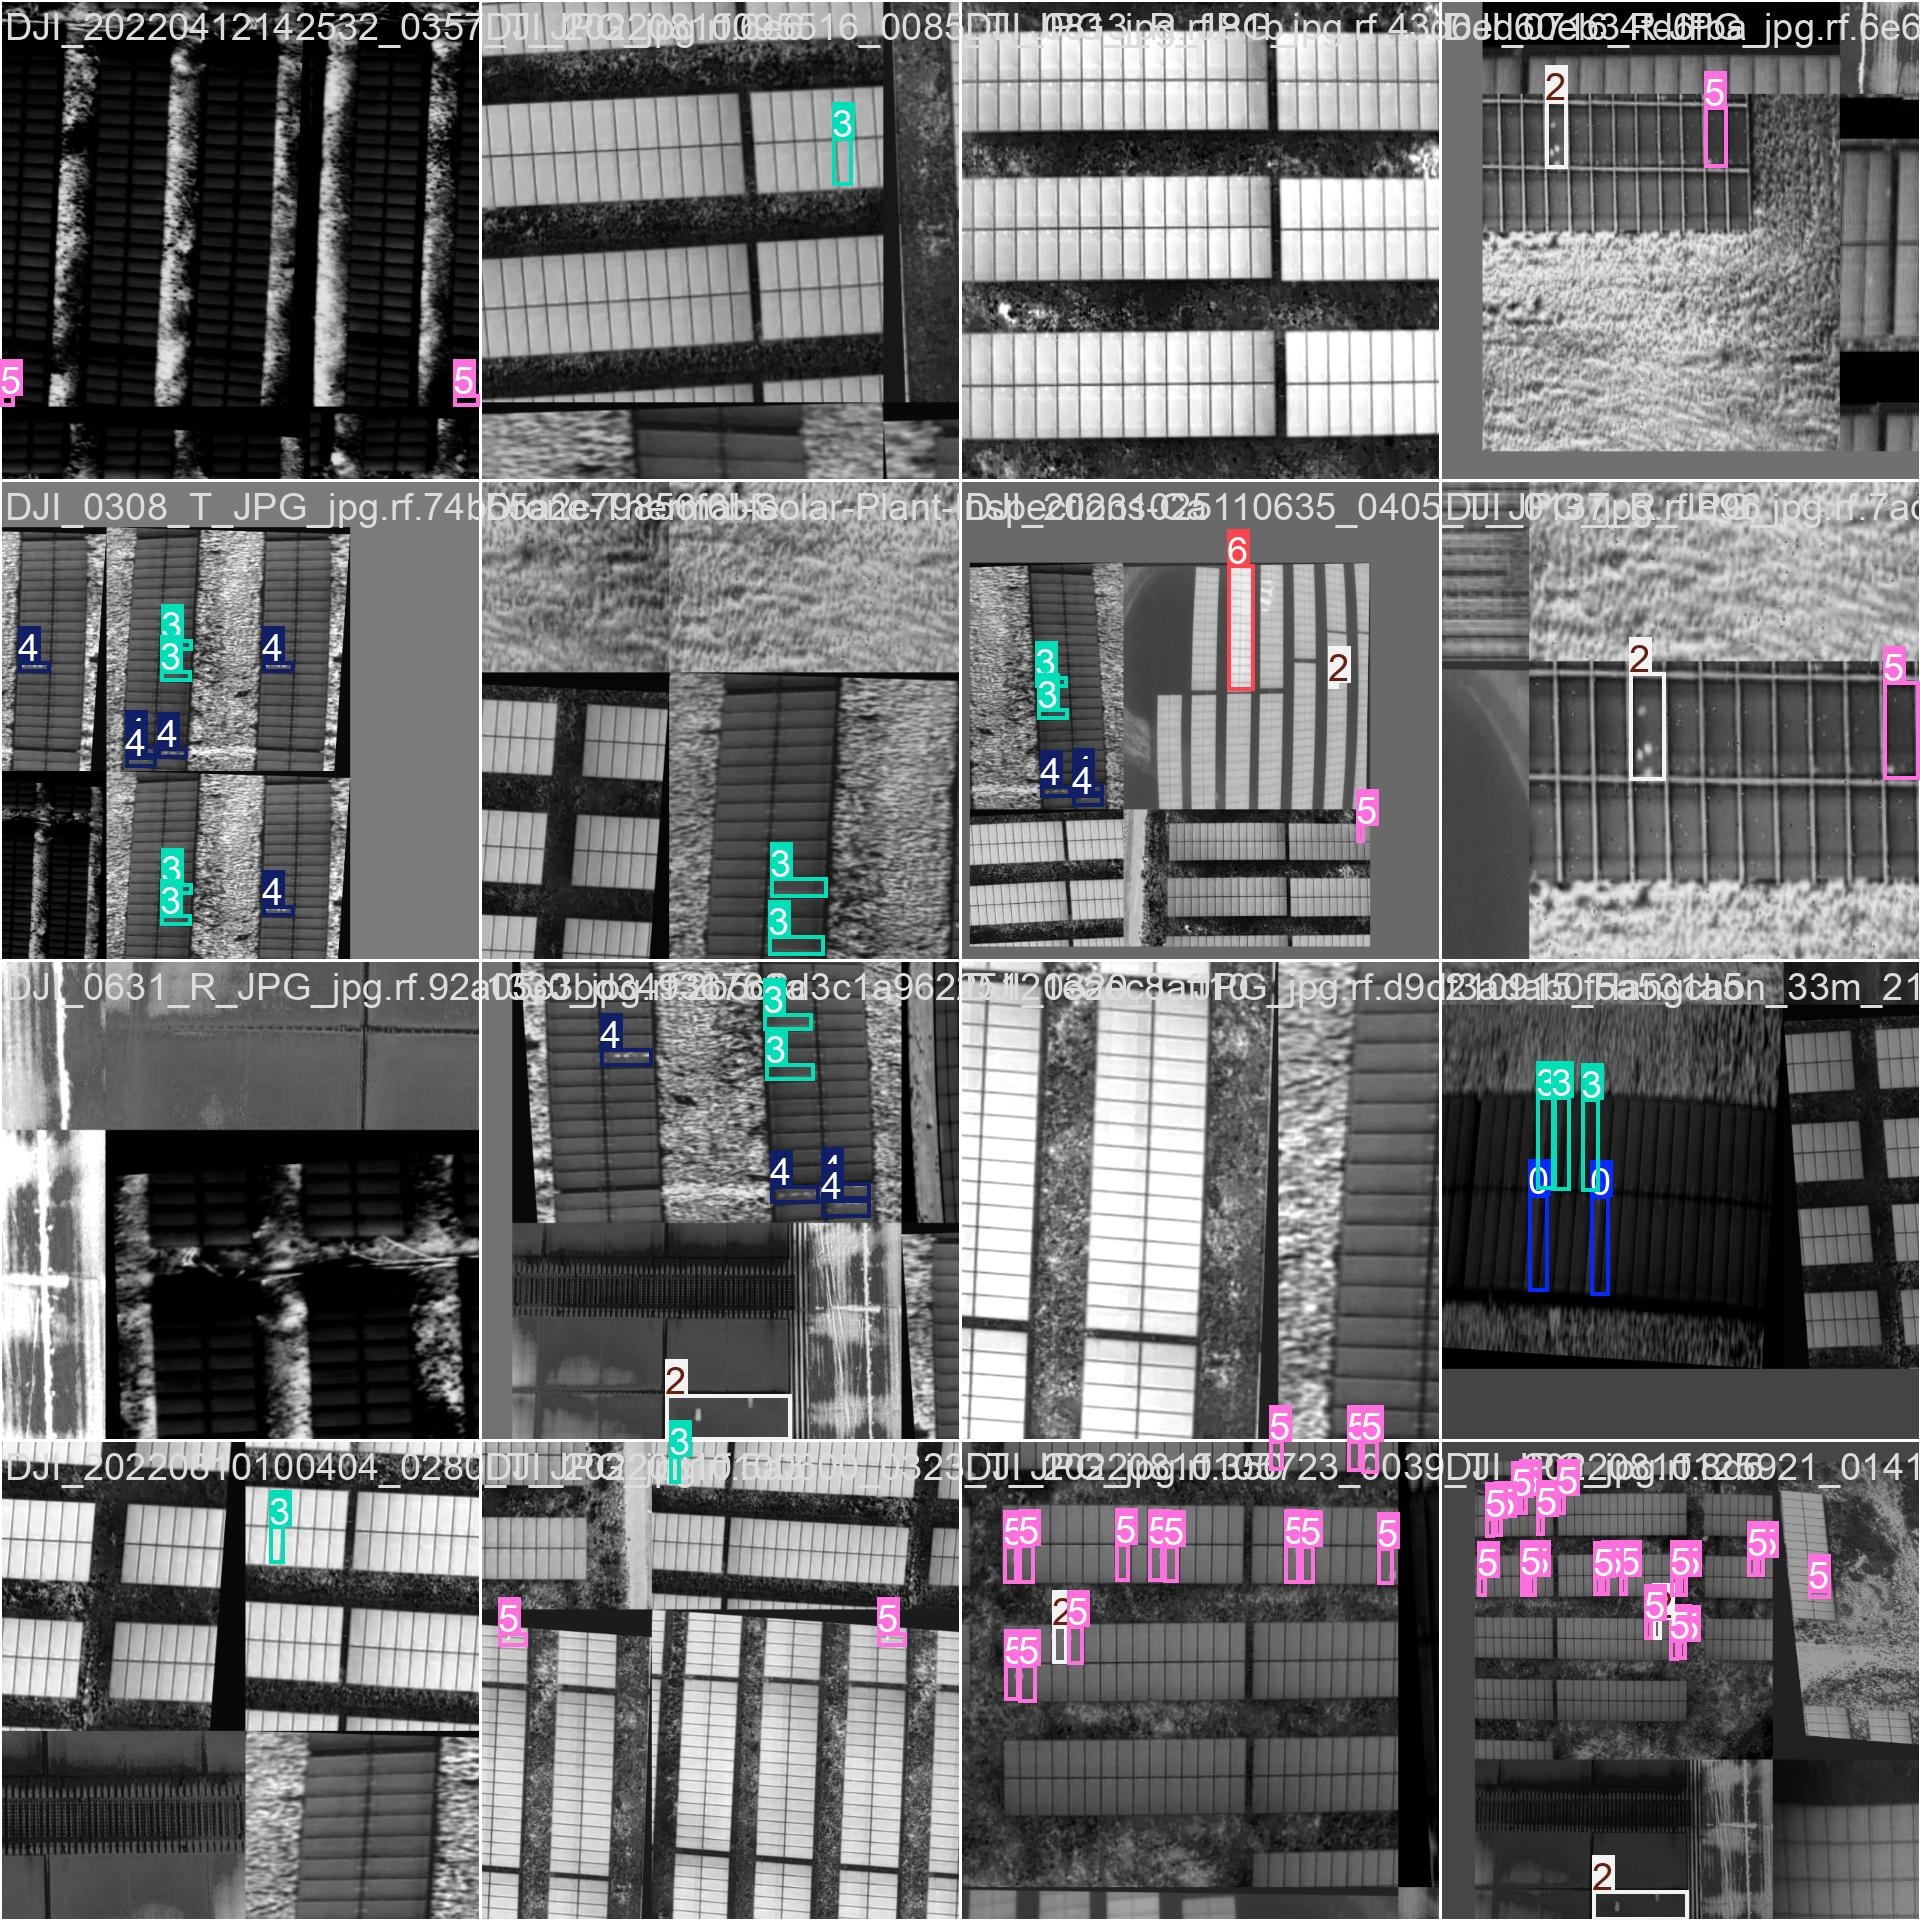

In [29]:
Image('/kaggle/working/yolo26-solarpanel/train_batch1.jpg')

In [1]:
%ls /kaggle/working/yolo26-solarpanel/weights

best.pt  last.pt


In [3]:
TEST_DIR = "/kaggle/input/solarpanel/ImageSet/test/images"

In [13]:
from ultralytics import YOLO

# Load the best weights
model = YOLO('/kaggle/working/yolo26-solarpanel/weights/best.pt')

# Run inference on test images
results = model.predict(
    source='/kaggle/input/solarpanel/ImageSet/test/images',
    save=True,                    # saves annotated images
    project='/kaggle/working',
    name='yolo26-test-results'
)


image 1/15 /kaggle/input/solarpanel/ImageSet/test/images/0raw_data_total_dataset_DJI_20230809115646_0006_T_jpg.rf.c0b14af525fab877a150a44ee6bfc1f3.jpg: 640x640 1 MultiHotSpot, 1 SingleHotSpot, 16.8ms
image 2/15 /kaggle/input/solarpanel/ImageSet/test/images/101MEDIA_DJI_0333_T_JPG_jpg.rf.13d79587843a1f42dac0797208e8eee8.jpg: 640x640 1 MultiHotSpot, 16.8ms
image 3/15 /kaggle/input/solarpanel/ImageSet/test/images/101MEDIA_DJI_0343_T_JPG_jpg.rf.ea0ecc6614d149112f7a62c294c6d300.jpg: 640x640 3 SingleByPasseds, 16.8ms
image 4/15 /kaggle/input/solarpanel/ImageSet/test/images/101MEDIA_DJI_0361_T_JPG_jpg.rf.c8e41676aa3376d7f77ff631b9216600.jpg: 640x640 2 MultiHotSpots, 16.7ms
image 5/15 /kaggle/input/solarpanel/ImageSet/test/images/101MEDIA_DJI_0385_T_JPG_jpg.rf.a4741f39b710b1e60aa3a5996bd96627.jpg: 640x640 2 SingleByPasseds, 1 SingleDiode, 16.7ms
image 6/15 /kaggle/input/solarpanel/ImageSet/test/images/101MEDIA_DJI_0421_T_JPG_jpg.rf.f51996aa55703f0b77cd6643c1e29606.jpg: 640x640 1 MultiHotSpot,